# Introduction
## May the _tensor_ flow with you...

After the team [Wakanda](https://en.wikipedia.org/wiki/Wakanda_(comics%29), I mean [Team Torch Panther](https://medium.com/ai-saturdays/aisaturdaylagos-the-torch-panther-cdec328c125b) or was it [team pytorch](pytorch.org) razzle dazzled the [AI Saturday Lagos community](https://medium.com/ai-saturdays) with its pythonic and dynamic neural networking ways, it was time for Tensors to take center stage with its elegant flow and high performance due to its C++ backend and lazy evaluation due to its computational graph execution model.

![Yoda Tensor Flows](memes/tensors-flows-from-node-to-node-they-do.jpg)

To learn more of how you can flow with the tensors, keep reading to be one with the Tensorflow.

# Objectives

- This Jupyter notebook would walk through how to classify handwritten digits using the [opensource Google Brain's](https://github.com/tensorflow) [tensorflow](https://www.tensorflow.org) python library.

- Further, only the low level tensorflow API would be used to demonstrate how to recognize images of digits(0 through 9) with over 99% accuracy.

# Install tensorflow
>> Setup shown for [Unix](https://en.wikipedia.org/wiki/Unix) / [Linux](https://en.wikipedia.org/wiki/Linux) / [OSX](https://en.wikipedia.org/wiki/MacOS)

This notebook would use the Google tensorflow python library. 
Pre-installation steps include:
- [installing anaconda](https://www.anaconda.com)
- installing tensorflow on your computer with anaconda: <code>conda install tensorflow</code>
    - Optionaly install a specific version of tensorflow <code>conda install tensorflow=1.0.0</code>

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline

# Setup an interactive session
Used to yield results of the built [computational graph](https://www.tensorflow.org/programmers_guide/graphs)

In [2]:
sess = tf.InteractiveSession()

# Reading the [mnist](http://yann.lecun.com/exdb/mnist) data 
This is data from the Mixed National Institute of Standards and Technology representing digitized handwritten digits

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# First convolution layer
- A convolutional layer is used to extract features of the image which are represented as [tensors](https://www.tensorflow.org/programmers_guide/tensors)
- The goal is to train weights and their biases that represents the learned important features of the images
- Weights and biases are represented as [variables](https://www.tensorflow.org/programmers_guide/variables) in tensorflow
- The actual convolution, [down sampling](https://www.tensorflow.org/tutorials/layers) the images, is done with [max_pool](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool)
- After the learning is complete for the first layer, the layer is then activated with an activation function.
- Since deep learning mimics the brain, a function that models a neuronal activation/learning is used. The current scientific consensus is that is done in a [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu) like manner.

In [4]:
x_image = tf.reshape(x, [-1,28,28,1]) 
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
h_conv1 = tf.nn.relu(convolve1)
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Second convolution layer
- To make our neural network get better at learning the image features, a second convolutional layer is added to aid its extraction of higher level features.
- This is how deep learning gets its name. Additional layers make for a _deeper learning_ of the images.

In [5]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')+ b_conv2
h_conv2 = tf.nn.relu(convolve2)
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2

# Fully connected layer
A fully connected layer is used to integrate all the learnings of the network.

In [6]:
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs
fcl=tf.matmul(layer2_matrix, W_fc1) + b_fc1
h_fc1 = tf.nn.relu(fcl)

# Optional dropout layer 
- In other to prevent overfitting (.i.e. over learning), dropout is used 
- The predictions are done using the softmax function to classify the digits being feed as input images. This is actually done on the fully connected layer

In [7]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]
fc=tf.matmul(layer_drop, W_fc2) + b_fc2
y_CNN= tf.nn.softmax(fc)

---------------

>>NOTE: The dropout layer marks the end of our computational graph

# Defining Loss Function and training the model
To know how well our network is doing, we use the cross_entropy function to measure our loss between trained and actual/test(never seen by our neural network before) input data.

In [8]:
layer4_test =[[0.9, 0.1, 0.1],[0.9, 0.1, 0.1]]
y_test=[[1.0, 0.0, 0.0],[1.0, 0.0, 0.0]]
np.mean( -np.sum(y_test * np.log(layer4_test),1))
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_CNN,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

num_iterations = 20000
batch_size = 50
for i in range(num_iterations):
    batch = mnist.train.next_batch(batch_size)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
	
print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.04
step 100, training accuracy 0.84
step 200, training accuracy 0.96
step 300, training accuracy 0.82
step 400, training accuracy 0.96
step 500, training accuracy 0.96
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.92
step 900, training accuracy 1
step 1000, training accuracy 0.98
step 1100, training accuracy 0.96
step 1200, training accuracy 0.92
step 1300, training accuracy 0.98
step 1400, training accuracy 0.94
step 1500, training accuracy 0.98
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 0.96
step 1900, training accuracy 0.96
step 2000, training accuracy 0.98
step 2100, training accuracy 1
step 2200, training accuracy 1
step 2300, training accuracy 0.94
step 2400, training accuracy 0.98
step 2500, training accuracy 0.98
step 2600, training accuracy 1
step 2700, training accuracy 0.98
step 2800, training accuracy 0.92
step 2900, training accuracy 1
step 3000,

# Visualisation

First get the tile_raster_images [utility](http://deeplearning.net/tutorial/code/utils.py) for drawing raster images from [deeplearning](http://deeplearning.net)

In [9]:
import utils
from utils import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image

[Kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing%29) in image processing is a small matrix used for blurring, sharpening, embossing, edge detection, and more. This is accomplished by doing a convolution between a kernel and an image.

In [10]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32,-1]))

Then plot the training accuracy

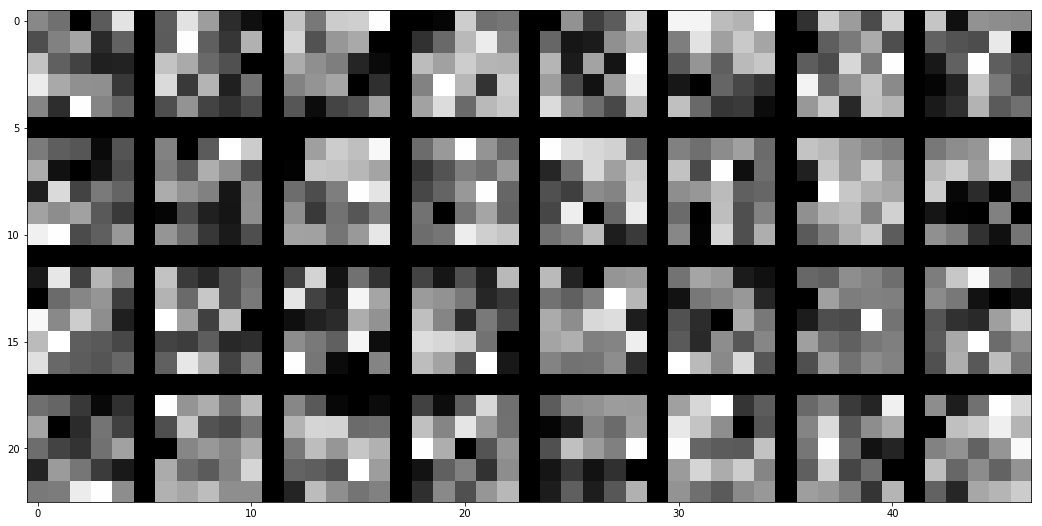

In [11]:
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

------------------

# closing the session

After the computational graph yields all its values, the session is then closed

In [12]:
sess.close() #finish the session

# Challenges
Our experience with Tensorflow was overrall positive. Some challenges and guides to overcome them include

- Having exceptions dealing with misplaced shape
<code>ValueError: Cannot feed value of shape (100, 784) for Tensor 'convolutional/X:0', which has shape '(?, 28, 28, 1)'</code>

This challenge becomes more and more apparent the deeper the network. Having a deeper network (.e.g. [GoogleNet](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf) ) with more parameters and layers for example can lead to situations where the shapes don't match. This is excarcebated by the fact that the final result is not known until after the static computational graph is run.

Building the computational graph step by step from small one layer onwards and testing continuously helped avoid this issue.

- Having a non-dynamic to see results of the neural network

The very speed of tensorflow comes from its lazy evaluation of a computational graph. However, when we were building the neural network and wanted to having branching logic based on various criteria(e.e.g loss, different layer performance .etc.), it was not straightforward.

Tensorflow now has an API to do [control flow](https://www.tensorflow.org/api_guides/python/control_flow_ops) but it ends up not being pythonic and adds an additional layer of complexity to the neural network logic.

# Team members
Thanks to 
1. Ejiro, an engineering student at UNILAG for putting together the presentation.
2. Tella Babatunde for working on neural network
3. Ibrahim Gbadegeshin for the A+ presentation
4. Juwe C. Raphael, Tunde Osborne for making it possible
5. Yours truly, [Todun](https://www.linkedin.com/in/todun), with the [jupyter notebook](https://github.com/todun/deep-frameworks-explore.git) for fielding questions and aggregating our effort

# References
- https://github.com/todun/deep-frameworks-explore.git
- http://bit.ly/aisaturday_tensorflow
